___
# PROJETO 1

## <font color='red'>Guilherme Zaborowsky Graicer</font>
___

## <font color='blue'>Desigualdade de Gênero entre aposentados (2011, 2013, 2014)</font>

## Introdução

O projeto tem como foco um tema que vem sendo discutido cada vez mais no Brasil, a desigualdade de gênero. Mais especificamente as diferenças de renda entre os aposentados (homens e mulheres) da região Sul do Brasil. Para analisar isso, foram usadas as Pesquisas Nacionais por Amostra de Domicílios (PNADs), de 2011, 2013 e 2014.

Como exeplo de pesquisa, foi esoclhida a tese "PROTEÇÃO SOCIAL, APOSENTADORIAS, PENSÕES E GÊNERO NO BRASIL", de Enid Rocha da Silva e Helmut Schwarzer (http://repositorio.ipea.gov.br/bitstream/11058/2830/1/TD_934.pdf). Essa pesquisa foi feita em Brasilia 2002, e discute as diferenças de gênero na refoma previdenciaria da época usando assim dados parecidos com os desse trabalho. Essa pesquisa utiliza varios gráficos e tabelas, recursos visuais muito ricos.

___
## Análise e Resultados

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\GuilhermeZaborowsky\Documents\Escola\Insper\Ciência dos Dados\Projeto 1


### Primeiramente, foram inicializadas as PNADs

In [10]:
dados14 = pd.read_csv('PES2014.csv')
dados14.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2014,11,15,1,1,2,19,8,1987,...,3,500,3,3,1,2,2,1,500,20160623
1,1,2014,11,15,1,2,4,19,1,1986,...,3,500,3,4,2,NaN,2,1,500,20160623
2,2,2014,11,15,1,3,2,14,5,2013,...,3,500,3,1,NaN,NaN,NaN,NaN,500,20160623
3,3,2014,11,15,2,1,2,8,4,1963,...,2,1150,4,2,1,2,2,1,1150,20160623
4,4,2014,11,15,2,2,4,6,11,1970,...,2,1150,4,3,1,2,2,1,1150,20160623


In [11]:
dados13 = pd.read_csv('pes2013R.csv')
dados13.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,1,2013,11,15,3,1,4,25,8,1971,...,1,350,3,2,2,NaN,NaN,2,350,20150428
1,2,2013,11,15,4,1,4,20,1,1949,...,2,339,2,1,2,NaN,NaN,2,339,20150428
2,3,2013,11,15,4,2,4,24,6,2000,...,2,339,2,2,2,NaN,NaN,2,339,20150428
3,4,2013,11,15,5,1,2,16,5,1990,...,3,266,2,1,1,2,2,1,266,20150428
4,5,2013,11,15,5,2,4,18,7,1994,...,3,266,2,5,2,NaN,NaN,2,266,20150428


In [12]:
dados11 = pd.read_csv('PES2011.csv')
dados11.head()

,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2011,11,11000000,1,1,2,25,12,1961,49,...,4,1.000000e+12,99,2,1,2,2,1,1.000000e+12,20100000
1,2011,11,11000000,1,2,4,1,4,1978,33,...,4,1.000000e+12,99,6,2,NaN,NaN,2,1.000000e+12,20100000
2,2011,11,11000000,1,3,4,15,6,1996,15,...,4,1.000000e+12,99,3,2,NaN,NaN,2,1.000000e+12,20100000
3,2011,11,11000000,1,4,2,3,12,2001,9,...,4,1.000000e+12,99,2,2,NaN,NaN,2,1.000000e+12,20100000
4,2011,11,11000000,2,1,4,16,10,1959,51,...,4,1.461000e+03,5,4,1,2,2,1,1.461000e+03,20100000


### Após isso, as PNADs são separadas em DataFrames mais organizados, nomeados e com somente as variaveis que vao ser usadas. Elas são: Aposentado, Sexo, Região, Anos de Trabalho, Renda Mensal per capita, Faixas de Renda (renda transformada em qualitativa), e RendaSM (renda/salario minimo)

In [13]:
d14 = pd.DataFrame()

d14["sexo"] = dados14.V0302
d14 = d14[~dados14.V0302.isnull()]
d14["aposentado"] = dados14.V9122
d14 = d14[~dados14.V9122.isnull()]
d14["renda"] = dados14.V4750 #renda per capita
d14 = d14[~dados14.V4750.isnull()]
d14["faixarenda"] = dados14.V4750
d14["rendaSM"] = dados14.V4750 #renda em salarios minimos (renda/salriominimo)
d14["regiao"] = dados14.UF
d14 = d14[~dados14.UF.isnull()]
d14["anostrabalho"] = dados14.V9611
d14 = d14[~dados14.V9611.isnull()]

d14.sexo = d14.sexo.astype('category')
d14.sexo.cat.categories = ('Masculino', 'Feminino')
d14.aposentado = d14.aposentado.astype('category')
d14.aposentado.cat.categories = ('Sim', 'Não')
d14 = d14[dados14.V9122 == 2] #pegar só aposentaods
d14 = d14[d14.renda != 999999999999] #tira os nao declarados
#d14 = d14[d14.renda < 250000]
d14 = d14[d14.renda < 10000]


salminimo14 = 724

d14.faixarenda[(dados14.V4720 == 0)] = 0
d14.faixarenda[(dados14.V4720 > 0) & (dados14.V4720 <= (salminimo14/4))] = 1
d14.faixarenda[(dados14.V4720 > (salminimo14/4)) & (dados14.V4720 <= (salminimo14/2))] = 2
d14.faixarenda[(dados14.V4720 > (salminimo14/2)) & (dados14.V4720 <= salminimo14)] = 3
d14.faixarenda[(dados14.V4720 > salminimo14) & (dados14.V4720 <= (salminimo14*2))] = 4
d14.faixarenda[(dados14.V4720 > (salminimo14*2)) & (dados14.V4720 <= (salminimo14*3))] = 5
d14.faixarenda[(dados14.V4720 > (salminimo14*3)) & (dados14.V4720 <= (salminimo14*5))] = 6
d14.faixarenda[(dados14.V4720 > (salminimo14*5))] = 7

d14.faixarenda = d14.faixarenda.astype('category')
#d14.faixarenda.cat.categories = ('Sem renda' ,'Até ¼ do salario minimo', 'Mais de ¼ até ½ salário mínimo', 'Mais de ½ até 1 salário mínimo', 'Mais de 1 até 2 salários mínimos', 'Mais de 2 até 3 salários mínimos', 'Mais de 3 até 5 salários mínimos', 'Mais de 5 salários mínimos')
d14.faixarenda.cat.categories = ('Mais de ½ até 1 salário mínimo', 'Mais de 1 até 2 salários mínimos', 'Mais de 2 até 3 salários mínimos', 'Mais de 3 até 5 salários mínimos', 'Mais de 5 salários mínimos')

d14.rendaSM= d14.rendaSM/salminimo14


d14.regiao[(dados14.UF >= 10) & (dados14.UF < 20)] = 0
d14.regiao[(dados14.UF >= 20) & (dados14.UF < 30)] = 1
d14.regiao[(dados14.UF >= 30) & (dados14.UF < 40)] = 2
d14.regiao[(dados14.UF >= 40) & (dados14.UF < 50)] = 3
d14.regiao[(dados14.UF >= 50) & (dados14.UF < 60)] = 4

d14.regiao = d14.regiao.astype('category')
d14.regiao.cat.categories = ('Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste')

d14 = d14[d14.regiao == 'Sul'] #Só o sul

print(">>>>2014<<<<<")
d14.head()

>>>>2014<<<<<


,sexo,aposentado,renda,faixarenda,rendaSM,regiao,anostrabalho
269307,Masculino,Sim,750,Mais de 3 até 5 salários mínimos,1.035912,Sul,1
269381,Feminino,Sim,1562,Mais de 1 até 2 salários mínimos,2.157459,Sul,2
269398,Masculino,Sim,759,Mais de ½ até 1 salário mínimo,1.048343,Sul,2
269399,Feminino,Sim,759,Mais de 1 até 2 salários mínimos,1.048343,Sul,1
269424,Masculino,Sim,4262,Mais de 5 salários mínimos,5.886740,Sul,16


In [15]:
d13 = pd.DataFrame()

d13["sexo"] = dados13.V0302
d13 = d13[~dados13.V0302.isnull()]
d13["aposentado"] = dados13.V9122
d13 = d13[~dados13.V9122.isnull()]
d13["renda"] = dados13.V4750 #renda per capita
d13 = d13[~dados13.V4750.isnull()]
d13["faixarenda"] = dados13.V4750
d13["rendaSM"] = dados13.V4750 #renda em salarios minimos (renda/salriominimo)
d13["regiao"] = dados13.UF
d13 = d13[~dados13.UF.isnull()]
d13["anostrabalho"] = dados13.V9611
d13 = d13[~dados13.V9611.isnull()]

d13.sexo = d13.sexo.astype('category')
d13.sexo.cat.categories = ('Masculino', 'Feminino')
d13.aposentado = d13.aposentado.astype('category')
d13.aposentado.cat.categories = ('Sim', 'Não')
d13 = d13[dados13.V9122 == 2] #pegar só aposentaods
d13 = d13[d13.renda != 999999999999] #tira os nao declarados
#d13 = d13[d13.renda < 250000]
d13 = d13[d13.renda < 10000]


salminimo13 = 678 


d13.faixarenda[(dados13.V4720 == 0)] = 0
d13.faixarenda[(dados13.V4720 > 0) & (dados13.V4720 <= (salminimo13/4))] = 1
d13.faixarenda[(dados13.V4720 > (salminimo13/4)) & (dados13.V4720 <= (salminimo13/2))] = 2
d13.faixarenda[(dados13.V4720 > (salminimo13/2)) & (dados13.V4720 <= salminimo13)] = 3
d13.faixarenda[(dados13.V4720 > salminimo13) & (dados13.V4720 <= (salminimo13*2))] = 4
d13.faixarenda[(dados13.V4720 > (salminimo13*2)) & (dados13.V4720 <= (salminimo13*3))] = 5
d13.faixarenda[(dados13.V4720 > (salminimo13*3)) & (dados13.V4720 <= (salminimo13*5))] = 6
d13.faixarenda[(dados13.V4720 > (salminimo13*5))] = 7

#print(d11.faixarenda.describe())
d13.faixarenda = d13.faixarenda.astype('category')
#d11.faixarenda.cat.categories = ('Sem renda' ,'Até ¼ do salario minimo', 'Mais de ¼ até ½ salário mínimo', 'Mais de ½ até 1 salário mínimo', 'Mais de 1 até 2 salários mínimos', 'Mais de 2 até 3 salários mínimos', 'Mais de 3 até 5 salários mínimos', 'Mais de 5 salários mínimos')
d13.faixarenda.cat.categories = ('Mais de ½ até 1 salário mínimo', 'Mais de 1 até 2 salários mínimos', 'Mais de 2 até 3 salários mínimos', 'Mais de 3 até 5 salários mínimos', 'Mais de 5 salários mínimos')

d13.rendaSM= d13.rendaSM/salminimo13


d13.regiao[(dados13.UF >= 10) & (dados13.UF < 20)] = 0
d13.regiao[(dados13.UF >= 20) & (dados13.UF < 30)] = 1
d13.regiao[(dados13.UF >= 30) & (dados13.UF < 40)] = 2
d13.regiao[(dados13.UF >= 40) & (dados13.UF < 50)] = 3
d13.regiao[(dados13.UF >= 50) & (dados13.UF < 60)] = 4

d13.regiao = d13.regiao.astype('category')
d13.regiao.cat.categories = ('Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste')

d13 = d13[d13.regiao == 'Sul'] #Só o sul

print(">>>>2013<<<<<")
d13.head()

>>>>2013<<<<<


,sexo,aposentado,renda,faixarenda,rendaSM,regiao,anostrabalho
268942,Feminino,Sim,1950,Mais de 3 até 5 salários mínimos,2.876106,Sul,8
269162,Feminino,Sim,1328,Mais de 2 até 3 salários mínimos,1.958702,Sul,40
269164,Masculino,Sim,678,Mais de ½ até 1 salário mínimo,1.000000,Sul,10
269193,Masculino,Sim,2100,Mais de 5 salários mínimos,3.097345,Sul,4
269196,Masculino,Sim,3271,Mais de 5 salários mínimos,4.824484,Sul,40


In [16]:
d11 = pd.DataFrame()

d11["sexo"] = dados11.V0302
d11 = d11[~dados11.V0302.isnull()]
d11["aposentado"] = dados11.V9122
d11 = d11[~dados11.V9122.isnull()]
d11["renda"] = dados11.V4750 #renda per capita
d11 = d11[~dados11.V4750.isnull()]
d11["faixarenda"] = dados11.V4750
d11["rendaSM"] = dados11.V4750 #renda em salarios minimos (renda/salriominimo)
d11["regiao"] = dados11.UF
d11 = d11[~dados11.UF.isnull()]
d11["anostrabalho"] = dados11.V9611
d11 = d11[~dados11.V9611.isnull()]

d11.sexo = d11.sexo.astype('category')
d11.sexo.cat.categories = ('Masculino', 'Feminino')
d11.aposentado = d11.aposentado.astype('category')
d11.aposentado.cat.categories = ('Sim', 'Não')
d11 = d11[dados11.V9122 == 2] #pegar só aposentaods
d11 = d11[d11.renda != 999999999999] #tira os nao declarados
d11 = d11[d11.renda < 250000]
d11 = d11[d11.renda < 10000]


salminimo11 = 545



d11.faixarenda[(dados11.V4720 == 0)] = 0
d11.faixarenda[(dados11.V4720 > 0) & (dados11.V4720 <= (salminimo11/4))] = 1
d11.faixarenda[(dados11.V4720 > (salminimo11/4)) & (dados11.V4720 <= (salminimo11/2))] = 2
d11.faixarenda[(dados11.V4720 > (salminimo11/2)) & (dados11.V4720 <= salminimo11)] = 3
d11.faixarenda[(dados11.V4720 > salminimo11) & (dados11.V4720 <= (salminimo11*2))] = 4
d11.faixarenda[(dados11.V4720 > (salminimo11*2)) & (dados11.V4720 <= (salminimo11*3))] = 5
d11.faixarenda[(dados11.V4720 > (salminimo11*3)) & (dados11.V4720 <= (salminimo11*5))] = 6
d11.faixarenda[(dados11.V4720 > (salminimo11*5))] = 7

#print(d11.faixarenda.describe())
d11.faixarenda = d11.faixarenda.astype('category')
#d11.faixarenda.cat.categories = ('Sem renda' ,'Até ¼ do salario minimo', 'Mais de ¼ até ½ salário mínimo', 'Mais de ½ até 1 salário mínimo', 'Mais de 1 até 2 salários mínimos', 'Mais de 2 até 3 salários mínimos', 'Mais de 3 até 5 salários mínimos', 'Mais de 5 salários mínimos')
d11.faixarenda.cat.categories = ('Mais de ½ até 1 salário mínimo', 'Mais de 1 até 2 salários mínimos', 'Mais de 2 até 3 salários mínimos', 'Mais de 3 até 5 salários mínimos', 'Mais de 5 salários mínimos')

d11.rendaSM= d11.rendaSM/salminimo11


d11.regiao[(dados11.UF >= 10) & (dados11.UF < 20)] = 0
d11.regiao[(dados11.UF >= 20) & (dados11.UF < 30)] = 1
d11.regiao[(dados11.UF >= 30) & (dados11.UF < 40)] = 2
d11.regiao[(dados11.UF >= 40) & (dados11.UF < 50)] = 3
d11.regiao[(dados11.UF >= 50) & (dados11.UF < 60)] = 4

d11.regiao = d11.regiao.astype('category')
d11.regiao.cat.categories = ('Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste')

d11 = d11[d11.regiao == 'Sul'] #Só o sul

print(">>>>2011<<<<<")
d11.head()

>>>>2011<<<<<


,sexo,aposentado,renda,faixarenda,rendaSM,regiao,anostrabalho
265564,Masculino,Sim,1000,Mais de 5 salários mínimos,1.834862,Sul,20
265607,Masculino,Sim,1615,Mais de 3 até 5 salários mínimos,2.963303,Sul,0
265633,Feminino,Sim,1245,Mais de 2 até 3 salários mínimos,2.284404,Sul,10
265745,Masculino,Sim,731,Mais de 2 até 3 salários mínimos,1.341284,Sul,5
265863,Masculino,Sim,2545,Mais de 3 até 5 salários mínimos,4.669725,Sul,10


### Para ter uma noção básica de como estão distribuidos od grupos temos graficos de barras com as frequências relativas de cada gênero por ano.

Frequências relativas por SEXO (2014):
Masculino    58.1
Feminino     41.9
dtype: float64 



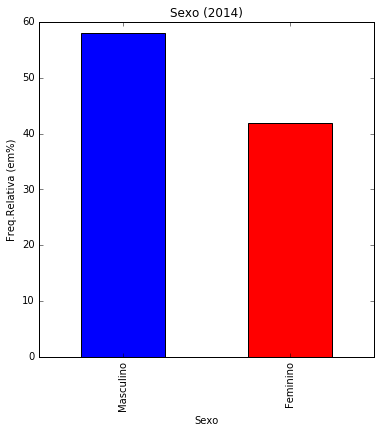

In [42]:
n=d14.shape[0] #numero de linhas
print('Frequências relativas por SEXO (2014):')
ut1 = (d14.sexo.value_counts()/n*100).round(decimals=1)
print(ut1,'\n')
plot = ut1.plot(kind='bar',title='Sexo (2014)',figsize=(6, 6),color=('b','r'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Sexo')

Frequências relativas por SEXO (2013):
Masculino    59.3
Feminino     40.7
dtype: float64 



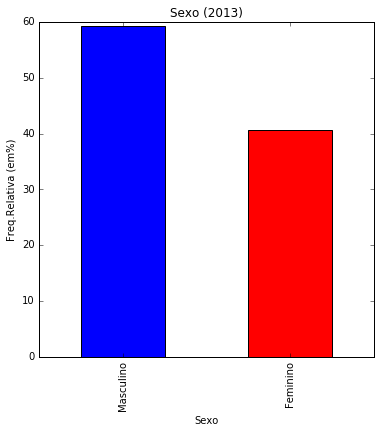

In [43]:
n13=d13.shape[0] #numero de linhas
print('Frequências relativas por SEXO (2013):')
ut13 = (d13.sexo.value_counts()/n13*100).round(decimals=1)
print(ut13,'\n')
plot = ut13.plot(kind='bar',title='Sexo (2013)',figsize=(6, 6),color=('b','r'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Sexo')

Frequências relativas por SEXO (2011):
Masculino    60.3
Feminino     39.7
dtype: float64 



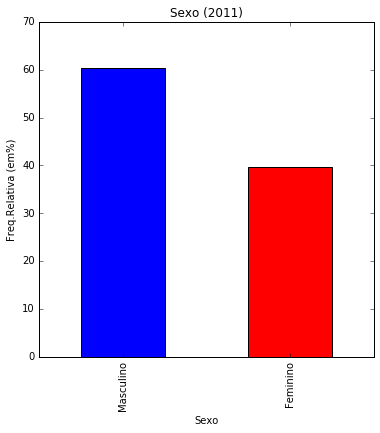

In [44]:
n11=d11.shape[0] #numero de linhas
print('Frequências relativas por SEXO (2011):')
ut11 = (d11.sexo.value_counts()/n11*100).round(decimals=1)
print(ut11,'\n')
plot = ut11.plot(kind='bar',title='Sexo (2011)',figsize=(6, 6),color=('b','r'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Sexo')

### Nada mais justo que tambem analisar as frequencias relativas quanto a faixa de renda. Percebe-se pelo grafico que as faixas tem frequencias equivalentes. 

Frequências relativas por Faixa de renda (2014):
Mais de 5 salários mínimos          22.7
Mais de 1 até 2 salários mínimos    21.0
Mais de 2 até 3 salários mínimos    19.8
Mais de 3 até 5 salários mínimos    19.6
Mais de ½ até 1 salário mínimo      16.9
dtype: float64 



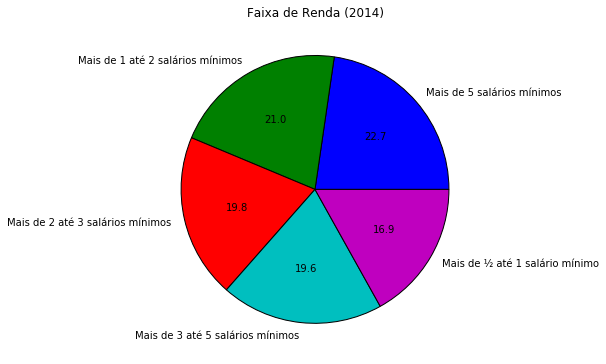

In [20]:
print('Frequências relativas por Faixa de renda (2014):')
ut2 = (d14.faixarenda.value_counts()/n*100).round(decimals=1)
print(ut2,'\n')
plot = ut2.plot(kind='pie',title='Faixa de Renda (2014)',autopct='%.1f',figsize=(6, 6))
plot.set_ylabel('')

Frequências relativas por Faixa de renda (2013):
Mais de 5 salários mínimos          21.6
Mais de 1 até 2 salários mínimos    20.8
Mais de 2 até 3 salários mínimos    20.8
Mais de 3 até 5 salários mínimos    20.7
Mais de ½ até 1 salário mínimo      16.0
dtype: float64 



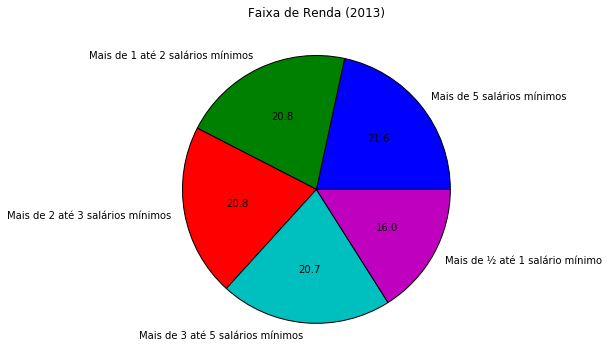

In [21]:
print('Frequências relativas por Faixa de renda (2013):')
ut23 = (d13.faixarenda.value_counts()/n13*100).round(decimals=1)
print(ut23,'\n')
plot = ut23.plot(kind='pie',title='Faixa de Renda (2013)',autopct='%.1f',figsize=(6, 6))
plot.set_ylabel('')

Frequências relativas por Faixa de renda (2011):
Mais de 5 salários mínimos          23.2
Mais de 3 até 5 salários mínimos    20.8
Mais de 1 até 2 salários mínimos    19.2
Mais de ½ até 1 salário mínimo      18.9
Mais de 2 até 3 salários mínimos    17.8
dtype: float64 



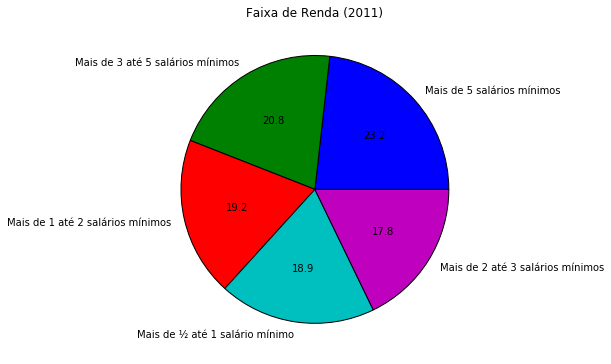

In [22]:
print('Frequências relativas por Faixa de renda (2011):')
ut21 = (d11.faixarenda.value_counts()/n11*100).round(decimals=1)
print(ut21,'\n')
plot = ut21.plot(kind='pie',title='Faixa de Renda (2011)',autopct='%.1f',figsize=(6, 6))
plot.set_ylabel('')

### Juntando as duas variaveis acima, temos a seguinte tabela e grafico. Podemos observar que, nos tres anos, as mulheres sempre são maioria na categoria 'mais de 1/2 até 1 salário mínimo' enquanto os homens são maioria esmagadora a partir de 3 salários mínimos.

Tabela Cruzada (sexo/renda[2014]) por total de COLUNAS (em %):


RENDA,Mais de ½ até 1 salário mínimo,Mais de 1 até 2 salários mínimos,Mais de 2 até 3 salários mínimos,Mais de 3 até 5 salários mínimos,Mais de 5 salários mínimos,All
SEXO,,,,,,
Masculino,44,49,53,71,70,58
Feminino,56,51,47,29,30,42
All,100,100,100,100,100,100


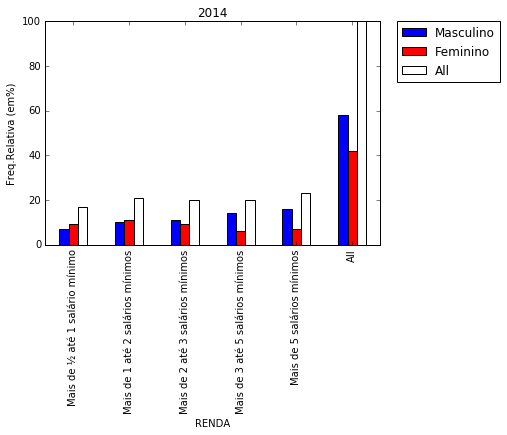

In [29]:
ct=pd.crosstab(d14.sexo,d14.faixarenda,margins=True,rownames=['SEXO'], colnames=['RENDA'])
ct2=(ct/len(d14)*100).round(decimals=0)
#Função que divide cada valor da tabela cruzada pelo total da última linha (quando axis=0) ou da última coluna (quando axis=1)
#Retorna tabela cruzada com valores sem casa decimais
#https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)
print('Tabela Cruzada (sexo/renda[2014]) por total de COLUNAS (em %):')
ct2=pd.crosstab(d14.sexo,d14.faixarenda,margins=True,rownames=['SEXO'], colnames=['RENDA']).apply(percConvert, axis=0)
ct4 = pd.crosstab(d14.faixarenda,d14.sexo,margins=True,rownames=['RENDA'], colnames=['SEXO'])
ct4 = (ct4/len(d14)*100).round(decimals=0)
plot = ct4.plot(kind='bar', color = ('b', 'r', 'w'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Freq.Relativa (em%)')
plt.title('2014')
ct2

Tabela Cruzada (sexo/renda[2013]) por total de COLUNAS (em %):


RENDA,Mais de ½ até 1 salário mínimo,Mais de 1 até 2 salários mínimos,Mais de 2 até 3 salários mínimos,Mais de 3 até 5 salários mínimos,Mais de 5 salários mínimos,All
SEXO,,,,,,
Masculino,40,55,58,71,68,59
Feminino,60,45,42,29,32,41
All,100,100,100,100,100,100


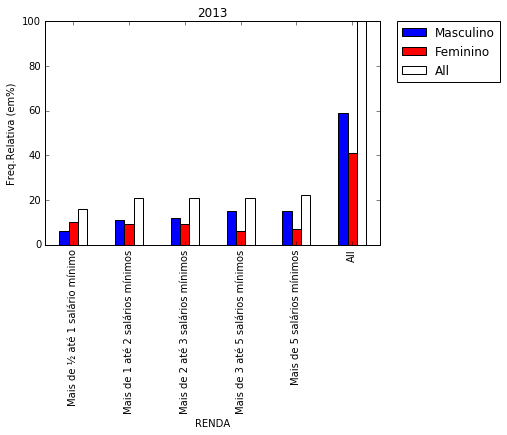

In [32]:
ct13=pd.crosstab(d13.sexo,d13.faixarenda,margins=True,rownames=['SEXO'], colnames=['RENDA'])
ct23=(ct13/len(d13)*100).round(decimals=0)
print('Tabela Cruzada (sexo/renda[2013]) por total de COLUNAS (em %):')
ct23=pd.crosstab(d13.sexo,d13.faixarenda,margins=True,rownames=['SEXO'], colnames=['RENDA']).apply(percConvert, axis=0)
ct43 = pd.crosstab(d13.faixarenda,d13.sexo,margins=True,rownames=['RENDA'], colnames=['SEXO'])
ct43 = (ct43/len(d13)*100).round(decimals=0)
plot = ct43.plot(kind='bar', color = ('b', 'r', 'w'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Freq.Relativa (em%)')
plt.title('2013')
ct23

Tabela Cruzada (sexo/renda[2011]) por total de COLUNAS (em %):


RENDA,Mais de ½ até 1 salário mínimo,Mais de 1 até 2 salários mínimos,Mais de 2 até 3 salários mínimos,Mais de 3 até 5 salários mínimos,Mais de 5 salários mínimos,All
SEXO,,,,,,
Masculino,41,53,61,72,71,60
Feminino,59,47,39,28,29,40
All,100,100,100,100,100,100


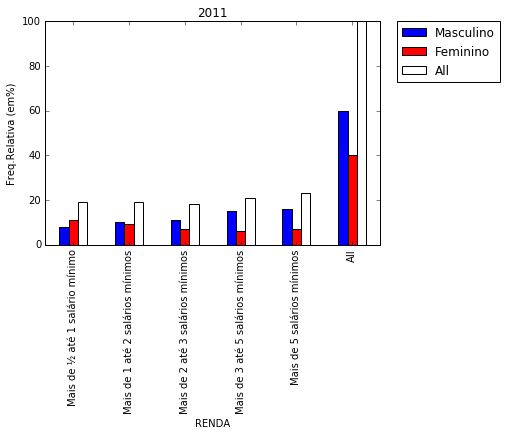

In [31]:
ct11=pd.crosstab(d11.sexo,d11.faixarenda,margins=True,rownames=['SEXO'], colnames=['RENDA'])
ct21=(ct11/len(d11)*100).round(decimals=0)
print('Tabela Cruzada (sexo/renda[2011]) por total de COLUNAS (em %):')
ct21=pd.crosstab(d11.sexo,d11.faixarenda,margins=True,rownames=['SEXO'], colnames=['RENDA']).apply(percConvert, axis=0)
ct41 = pd.crosstab(d11.faixarenda,d11.sexo,margins=True,rownames=['RENDA'], colnames=['SEXO'])
ct41 = (ct41/len(d11)*100).round(decimals=0)
plot = ct41.plot(kind='bar', color = ('b', 'r', 'w'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Freq.Relativa (em%)')
plt.title('2011')
ct21

### Abaixo temos BOXPLOTs da renda  mensal per capita (em qtdade de de salarios mínimos da época). É possivel observar uma desigualdade de gênero constante ao longo do 3 anos.

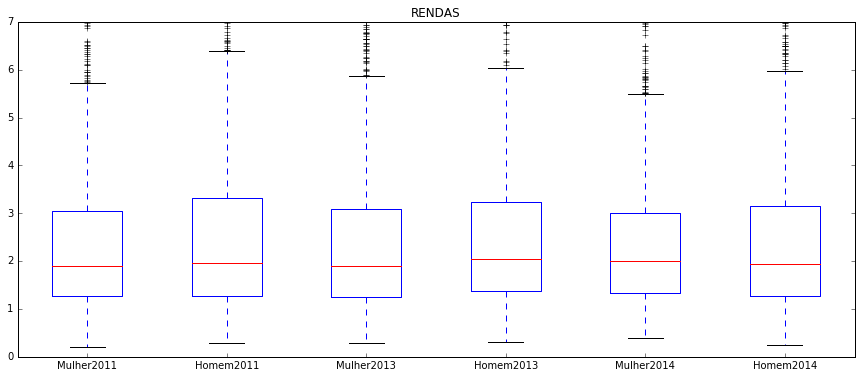

In [41]:
Box2011 = pd.DataFrame([d11.rendaSM[d11.sexo=='Masculino'], d11.rendaSM[d11.sexo=='Feminino'], d13.rendaSM[d13.sexo=='Masculino'], d13.rendaSM[d13.sexo=='Feminino'], d14.rendaSM[d14.sexo=='Feminino'], d14.rendaSM[d14.sexo=='Masculino']], index=('Mulher2011','Homem2011','Mulher2013','Homem2013','Mulher2014','Homem2014'))
Box2011 =Box2011.T
Box2011.plot.box(ylim=(0,7), figsize=(15,6), title=('RENDAS'))

 ### Tentando achar uma causa para renda, foi feito o seguinte gráfico de dispersão. Além dele tem foi calculado o coeficiente de correlação. Como é um número muuito pequeno (proximo de 0), podemos dizer que não há relação entre essas variaveis. (tudo em 2014)

In [38]:
Masc2014 = d14[d14.sexo=='Masculino']
Fem2014 = d14[d14.sexo=='Feminino']

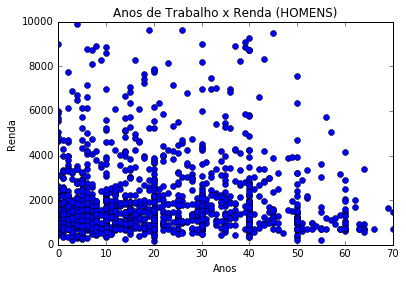

Correlação entre Anos de trabalho e Renda (HOMENS):  0.0656703038545


In [39]:
plt.plot(Masc2014.anostrabalho, Masc2014.renda, 'bo')
plt.title('Anos de Trabalho x Renda (HOMENS)')
plt.xlabel('Anos')
plt.ylabel('Renda')
plt.show()
print("Correlação entre Anos de trabalho e Renda (HOMENS): ", np.corrcoef(Masc2014.anostrabalho,Masc2014.renda)[0,1])

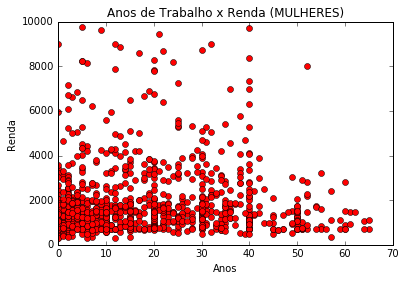

Correlação entre Anos de trabalho e Renda (MULHERES):  0.0159979239227


In [40]:
plt.plot(Fem2014.anostrabalho, Fem2014.renda, 'ro')
plt.title('Anos de Trabalho x Renda (MULHERES)')
plt.xlabel('Anos')
plt.ylabel('Renda')
plt.show()

print("Correlação entre Anos de trabalho e Renda (MULHERES): ", np.corrcoef(Fem2014.anostrabalho,Fem2014.renda)[0,1])

___
## Conclusão 

Pode-se concluir que há uma desigualdade de genêro, provada pelas diferenças de renda mensal per capita, nos aposentados da região Sul do Brasil. Olhando para renda na forma de salarios minimos é possivel observar que essa desigualdade se manteve bem parecida nos anos de 2011, 2013 e 2014. Alem disso, descobrimos que a quantidade de anos de trabalho nao influencia na renda do/a aposentado.